# My Spotify Data

Katie Stevens  
12/17/2020  
CPSC 222 Fall 2020  
Gina Sprint  


## Introduction
### Domain Introduction
This project takes place in the domain of music, specifically, spotify.  
Music had always been very important to me. I have played instruments all throughout high school and here at Gonzaga in the bulldog band. It has always been a central part of my life. Music is correlated to my current moods and personality. I wanted to research my streaming history on spotify to learn more about myself through what songs I choose to listen to on a daily basis.

### Dataset Description
There is two files containined my Spotify streaming history in JSON format. The given attributes for this data are: endTime, artistName, trackName, and msPlayed.

### Hypotheses
If I listen to music during the week then, the average time I spend listening to music during the weekend is greater than during weekdays.  
If I stream music from spotify then, the mean time spent listening during the school year is different than during the summer.

### Classification
I used a kNeighbors classifier and a Decision Tree classifier to classify whether I skipped a song or not. 

## Data Analysis
### Dataset Description
In this dataset, I have my spotify streaming history in JSON format that I downloaded from Spotify's website. The streaming history dateset is organized by four attributes: endTime (the date and time the track stopped playing), artistName (name of the artist), trackName (name of the song or track), and msPlayed (time played in milliseconds).  
I decided to split the endTime column into two separate attributes 'Date' and 'Time'. I also add a column, 'Day of Week', that has the Day of the Week that song was streamed. To use for classification, I add another column, 'Skipped', about whether the track was skipped (true) or not skipped (false).

### Data Preparation
Summary of data cleaning.

The endTime column in the spotify dataset has the exact date and the time when the streaming for a specific song ended. I wanted to separate the date and the time to two different columns for readability and to make the data easier to use.

Import libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

Read in and combine the data into one dataframe.

In [24]:
spotify1 = pd.read_json("StreamingHistory0.json")
spotify2 = pd.read_json("StreamingHistory1.json")
spotify_stream = spotify1.append(spotify2)

By default, spotify streaming history is recorded in UTC (Coordinated Universal Time).  
Converted to PST (Pacific Standard Time).  
I did not think about this problem when I chose this dataset. Throughout the year I go between time zones, PST (Pacific Standard Time) and HST (Hawaii Standard Time). I was not able to figure out how to separate these easily so I converted the timezone to PST for simplicity. 

I also split the column 'endTime' into two columns, 'Date' and 'Time'. 'Date' is set as the index in the DataFrame.

In [3]:
spotify_stream = utils.convert_timezone(spotify_stream)
spotify_stream = utils.split_endTime(spotify_stream)

In [4]:
start = spotify_stream.index[0]
end = spotify_stream.index[-1]
print("Spotify Streaming Data from", start, "to", end)

Spotify Streaming Data from 2019-11-30 to 2020-11-30


Adds the column 'Day of Week' 

In [5]:
spotify_stream = utils.add_day_of_week(spotify_stream)

I decided to convert milliseconds into seconds for easier readability. 

In [6]:
spotify_stream["msPlayed"] = spotify_stream["msPlayed"] / 1000
spotify_stream = spotify_stream.rename(columns={"msPlayed": "secPlayed"})

### Exploratory Data Analysis

Calculated and displayed my total listening time in hours.

In [7]:
time = np.sum(spotify_stream["secPlayed"])
time = time / 60 / 60 # hours
print("I spent about %.2f"%time, "total hours listening to music on Spotify from", start, "to", end)

I spent about 675.97 total hours listening to music on Spotify from 2019-11-30 to 2020-11-30



A true or false column named 'Skipped' is added to the end of the DataFrame. The number of songs skipped is calculated.  
A copy of the original spotify streaming is made to be used later and the skipped songs are removed from the data set. 

In [8]:
spotify_stream, num_skipped = utils.add_skip_col(spotify_stream)
total = len(spotify_stream)
percent = (num_skipped / len(spotify_stream)) * 100
spotify_stream_full = spotify_stream.copy() # For future use
spotify_stream = spotify_stream[~spotify_stream['Skipped']] # Filter out skipped songs

print("Total songs listened to:", total)
print("Number of skipped songs:", num_skipped, "(listened to for less than 60 seconds).")
print("I skipped %.2f"%percent, "% of the songs I listened to.")

Total songs listened to: 19009
Number of skipped songs: 6718 (listened to for less than 60 seconds).
I skipped 35.34 % of the songs I listened to.


Calculated and displayed the number of unique artists I listened to and my top five artists.

In [9]:
artist_played = utils.get_most_artists(spotify_stream)

print("Number of unqiue artists listened to: ", len(artist_played), "\n")

print("Top five artists:")
for i in range(0, 5):
    print("\n", i + 1, ". ", artist_played.index[i], " (", artist_played[i], " times streamed)", sep='')

Number of unqiue artists listened to:  1485 

Top five artists:

1. Rex Orange County (470 times streamed)

2. Quinn XCII (416 times streamed)

3. Panic! At The Disco (377 times streamed)

4. Billie Eilish (288 times streamed)

5. Conan Gray (281 times streamed)


Calculated and displayed the number of unqiue tracks I listened to and my top five tracks.

In [10]:
track_played = utils.get_most_tracks(spotify_stream)

print("Number of unqiue tracks listened to: ", len(track_played), "\n")

print("Top five tracks:")
for i in range(0, 5):
    print("\n", i + 1, ". ", track_played.index[i], " (", track_played[i], " times streamed)", sep='')

Number of unqiue tracks listened to:  3349 

Top five tracks:

1. Best Friend (98 times streamed)

2. Maniac (85 times streamed)

3. Flare Guns (83 times streamed)

4. Straightjacket (75 times streamed)

5. Electric Love (74 times streamed)


I found these results quite surprising. They match what Spotify Wrapped 2020 reported but it did not tell me the number of times streams per song. I thought the differences would be larger.

### Weekend vs Weekday listening

Hypothesis: If I listen to music during the week then, the average time I spend listening to music during the weekdays is greater than during weekends. 

$H_0: \mu_{weekday} \leq \mu_{weekend}$  
$H_1: \mu_{weekday} > \mu_{weekend}$

$\alpha = 0.10$

In [11]:
mean_time_dow = utils.mean_day_of_week(spotify_stream)
weekend, weekday = utils.split_weekdays(spotify_stream)

In [12]:
import scipy.stats as stats

t_computed, p_val = stats.ttest_ind(weekday, weekend)
print("t-computed:", t_computed)
print("p-value:", p_val / 2)

dof = len(weekend) + len(weekday) - 2
print("dof:", dof)

t-computed: 0.9863383336954812
p-value: 0.16199326678108644
dof: 12289


From the t-distribution chart:  
Using $\alpha = 0.10$ and df = 19007 and knowing it is a one-tailed test we find:  
t-critical = 1.282.

Since t-computed = 1.546 is greater than t-critical = 1.282, we Reject $H_0$. At the 0.10 significance level, we can conclude that  the average time I spend listening to music during the weekdays is greater than during the weekends.

To visualize this data, I created a bar graph of Average Time Music Streamed vs. Day of Week.

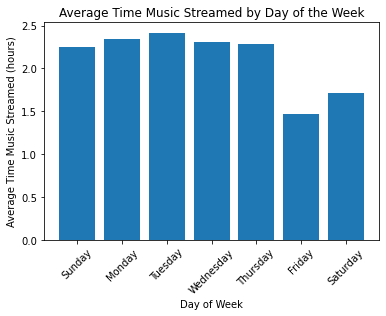

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(mean_time_dow.index, mean_time_dow)
plt.xticks(rotation=45)

plt.title("Average Time Music Streamed by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Time Music Streamed (hours)")
plt.show()

Looking at the graph, the days Sunday through Thursday show a consistent average of about 2.0 - 2.5 hours of average time streaming music. There looks to be a significant decrease of listening to music on Friday's and Saturday's. I think this is because on Friday's and Saturday's I typically decide to go out and do things so I am not listening to music.  
Except for Friday, Saturday and Sunday have the least average streaming time for music. 

### Summer vs School Listening

If I stream music from spotify then, the mean time spent listening during the school year is different than during the summer. 

$H_0: \mu_{school} = \mu_{summer}$  
$H_1: \mu_{school} \neq \mu_{summer}$  

$\alpha = 0.10$

In [14]:
summer_df = spotify_stream.loc["2020-05-16":"2020-08-30"] # May to August
school_df =  spotify_stream.loc["2020-08-31":] # September to December

In [15]:
summer = utils.date_total_time(summer_df)
school = utils.date_total_time(school_df)
t_computed, p_val = stats.ttest_ind(school, summer)
print("t-computed:", t_computed)
print("p-value:", p_val / 2)
dof = len(school) + len(summer) - 2
print("dof:", dof)

t-computed: -0.8903599652008447
p-value: 0.1871793398249909
dof: 197


From the t-distribution chart:  
Using $\alpha = 0.10$ and df = 197 and knowing it is a two-tailed test we find:  
t-critical = 1.645.

Since t-computed = -0.890 and is between t-critical = -1.645 and 1.645, we Do Not Reject $H_0$. At the 0.10 significance level, we can not conclude that there is a difference between the average time streaming music during the school year is different than during the summer.

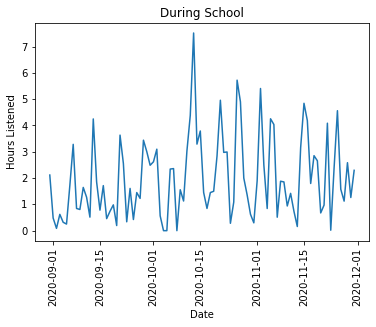

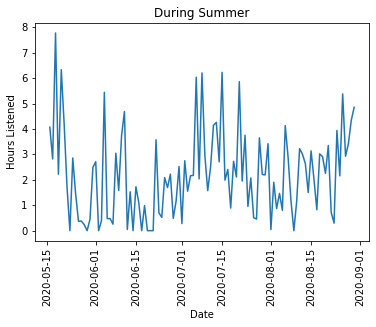

In [16]:
# School
plt.plot(school.index, school)
plt.title("During School")
plt.xlabel("Date")
plt.ylabel("Hours Listened")
plt.xticks(rotation=90)
plt.show()

# Summer
plt.plot(summer.index, summer)
plt.title("During Summer")
plt.xlabel("Date")
plt.ylabel("Hours Listened")
plt.xticks(rotation=90)
plt.show()

I can see from the graphs that my listening time is quite sporatic. There are a few outliers where I listen to almost 7 or 8 hours in one day and there are several days that I do not listen to music at all. 

From seeing the graphs by day, I was curious to see how big of a difference if I looked at the data during the summer and during school but by day of the week.

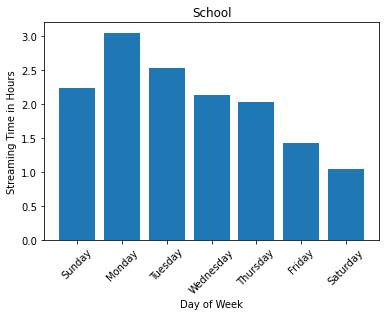

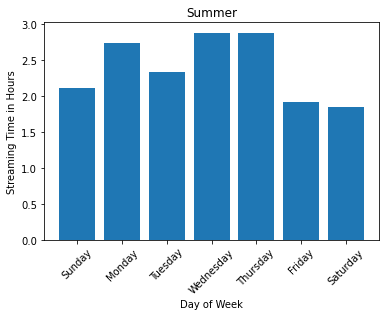

In [17]:
school = utils.mean_day_of_week(school_df)
summer = utils.mean_day_of_week(summer_df)

#School
plt.bar(school.index, school)
plt.title("School")
plt.xlabel("Day of Week")
plt.ylabel("Streaming Time in Hours")
plt.xticks(rotation=45)
plt.show()

plt.bar(summer.index, summer)
plt.title("Summer")
plt.xlabel("Day of Week")
plt.ylabel("Streaming Time in Hours")
plt.xticks(rotation=45)
plt.show()

From these graphs, I can see that I have a trend during the summer where I listen to music the most durinng Monday then is steadily decreases each day until Sunday. I think this might be because Sunday and Monday are typically my biggest study days and I typically like to listen to music while I study.  
The graph showing my listening time during the summer does not show a solid trend based on day of the week. I think this is because I do not typically have a schedule during the summer.

## Classification

I wanted to see if I can classify whether I skipped a song or not from the attributes.  

I set the 'Skipped' column to y and set the rest of the dataset without 'Skipped' to X. I also dropped the column 'secPlayed' from the dataset because that is what I used to initially predict if the song was skipped or not. I only want to look at the attributes: 'Date', 'Time', 'trackName', 'artistName', and 'Day of Week'.

In [18]:
spotify_stream = spotify_stream_full
y = spotify_stream['Skipped']
X = spotify_stream.drop(columns=['Skipped', 'secPlayed'], axis=1)

Because most of my attributes are categorical, I needed to transform them to numerical. I did this using LabelEncoder.

In [19]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X.index = le.fit_transform(X.index)
X['trackName'] = le.fit_transform(X['trackName'])
X['artistName'] = le.fit_transform(X['artistName'])
X['Time'] = le.fit_transform(X['Time'])
X['Day of Week'] = le.fit_transform(X['Day of Week'])

I split the dataset into a training and testing set. Reserving 25% for the training set. 

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Using kNeighbors, I calculated the prediction accuracy.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=8) # 8 neighbors gives the best accuracy

neigh.fit(X_train, y_train)

accuracy = neigh.score(X_test, y_test)
print("KNeighbors Classifer Accuracy:", accuracy)

y_predicted = neigh.predict(X_test)

KNeighbors Classifer Accuracy: 0.6341258152745635


Using the Decision Tree Classifier, I calculated the predicted accuracy.

In [22]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3) # max depth of 3 gives the best accuracy
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Decision Tree Classifier Accuracy:", accuracy)

Decision Tree Classifier Accuracy: 0.6522196507468967


## Conclusion

Overall, this project made me realize how much I listen to music on the daily. If I were to do this again, I would compare my streaming history to a dataset of what activitiy I am doing while listening to music.  
I used my data to compare the time I listened to music to the day of the week. From my hypothesis, I found that it was statistically significant that I listened to music during the weekdays more than the weekends. I was also curious to how my streaming history data changed from being on break during the summer to being in school. The hypothesis did not provide me with a statistically significant conclusion whether I listened to music more during school or during the summer. Though by graphing this data, I was able to see that I had more of a pattern when listening to music during the school year than during the summer. 

I used the Date, Time, artistName, trackName, and Day of Week to predict whether I skipped a song or not. The first thing I had to do was transform my data into numeric data to be able to use the classifier. My classifier worked relatively well at being able to predict correctly if I skipped a song or not about 65% of the time. The Decision Tree Classifier has a better accuracy compared to the kNeighbors classifier.  
The stakeholders for this project are myself, Spotify, and people who are interested on how music affects the student.